In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tqdm

In [2]:
migrant = pd.read_csv("Migrant/migrant_1800.csv",index_col=0)
migrant.rename(columns={"0":"word", "1":"year","2":"count"},inplace=True)


In [3]:
def migrants(language_out,language_in,years):
    migrant_df = pd.read_csv("Migrant/migrant_1800.csv",index_col=0)
    migrant_df.rename(columns={"0":"word", "1":"year","2":"count"},inplace=True)


    #Take only the first appearances of words
    first_appearance = migrant.drop_duplicates(subset='word', keep='first')
    
    #take the words created by the out language.
    out_words = first_appearance[first_appearance["language"] == language_out ]
    

    migrated_from_out = migrant_df[(migrant_df["word"].isin(out_words["word"])) & 
                               (migrant_df["year"].isin(years)) &
                                (migrant_df["language"] == language_in)
                               ]
    return(migrated_from_out)


In [28]:
def ranking(language_out,language_in,year,exclude="_exc_all"):
    migrant_words = migrants(language_out,language_in,range(1800,year))["word"]

    lan_in = pd.read_csv("Top5000/"+"top_"+language_in + exclude+
                ".csv",header=None)
    
    lan_in_year = lan_in[lan_in[1]==year]
    
    lista = lan_in_year[lan_in_year[0].isin(migrant_words)]
    lista = lista.sort_values(by=2,ascending=False)
    lista["rank"] = lista[2].rank(ascending=False,method="first")
    
    return(lista)

ranking("french","spanish",1900)
    

,0,1,2,rank
800024,nombre,1900,124214,1.0
800118,ii,1900,64191,2.0
800243,demanda,1900,43754,3.0
800255,base,1900,42922,4.0
800374,municipal,1900,33349,5.0
800557,plan,1900,25448,6.0
800586,examen,1900,24673,7.0
800677,municipales,1900,22120,8.0
800682,simple,1900,22038,9.0
800715,servir,1900,21384,10.0


In [29]:
def rank_div(language_out,language_in,years,exclude="_exc_all"):
    listas = []
    for year in tqdm.tqdm(years):
        listas.append(ranking(language_out,language_in,year,exclude))
    
    ranks = min([len(lista) for lista in listas])
    
    res = []
    for rank in tqdm.tqdm(range(1,ranks+1)):
        elementos_rank = []
        for lista in listas:
            elementos_rank.append(lista[lista["rank"]==float(rank)][0])
        
        res.append(len(np.unique(elementos_rank)))
        
        
    f = open("Fig4_data/" + language_out+"_"+language_in+ exclude + ".txt","w")
    
    for r in res:
        f.write(str(r)+",")
    
    return(res)
        

english french


100%|████████████████████████████████████████████████████████████████████████████████| 302/302 [00:16<00:00, 18.34it/s]


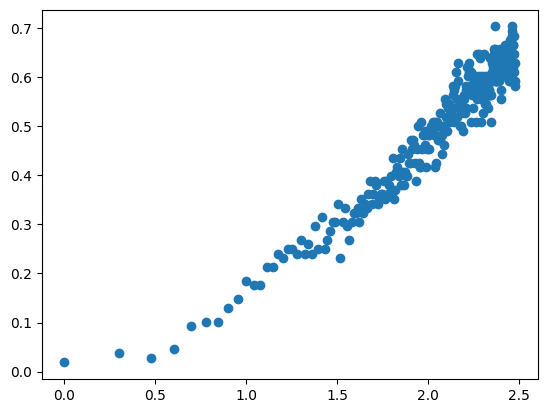

english spanish


100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [00:03<00:00, 22.07it/s]


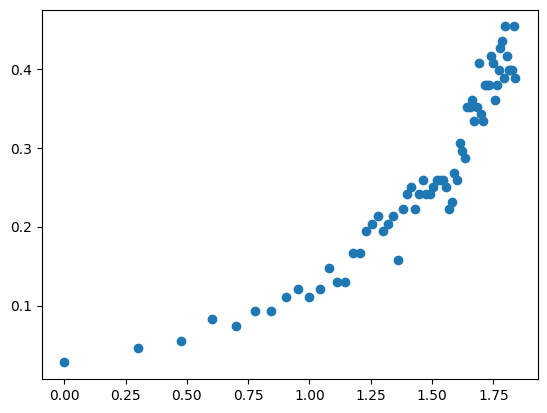

english german


100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:03<00:00, 22.56it/s]


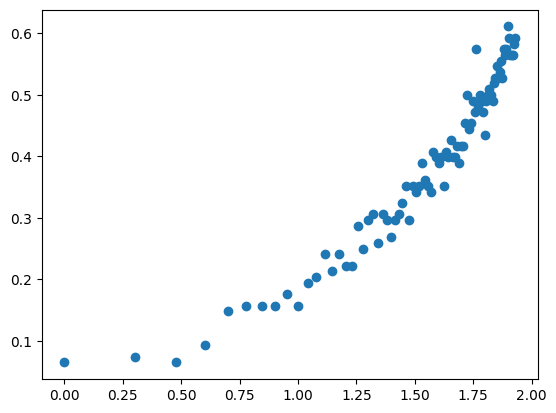

english italian


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:02<00:00, 22.71it/s]


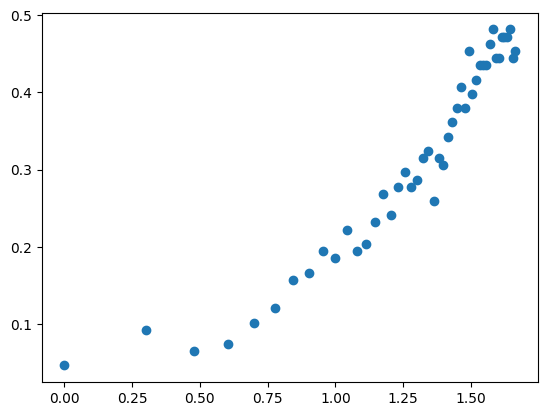

french english


100%|████████████████████████████████████████████████████████████████████████████████| 299/299 [00:12<00:00, 23.55it/s]


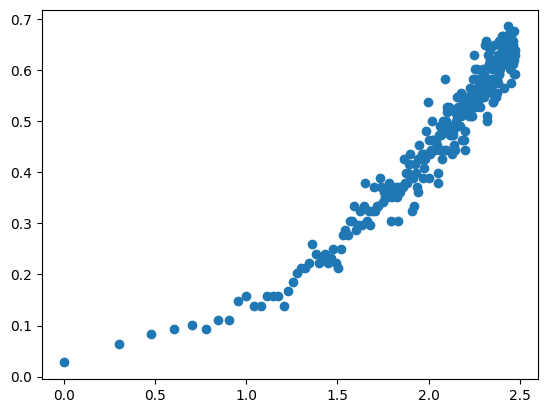

french spanish


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:02<00:00, 17.89it/s]


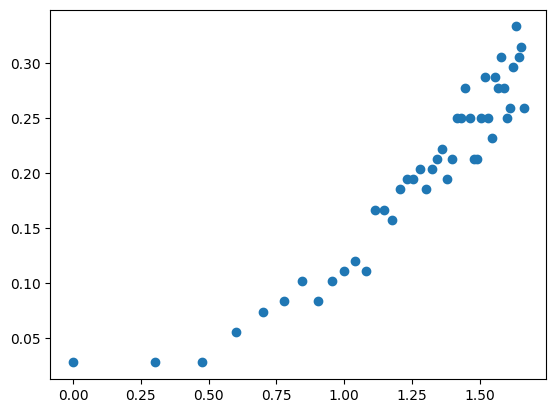

french german


100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:02<00:00, 23.70it/s]


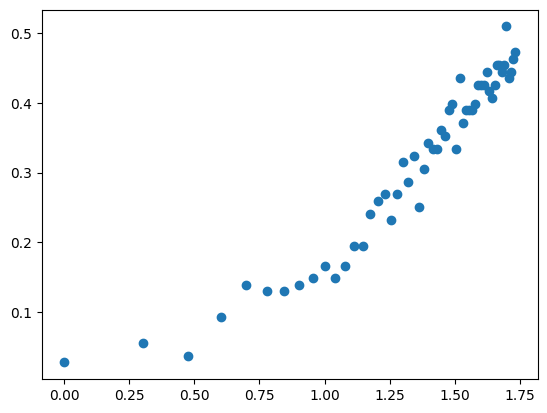

french italian


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 24.62it/s]


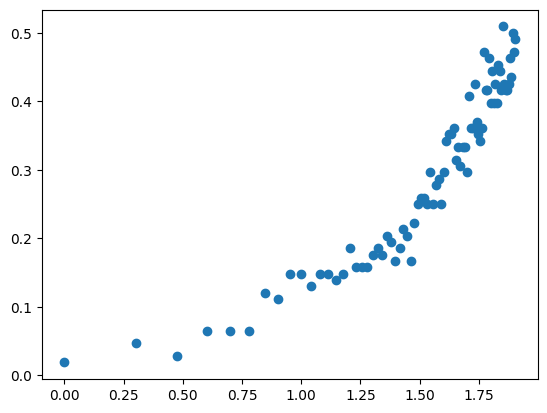

spanish english


100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:04<00:00, 23.73it/s]


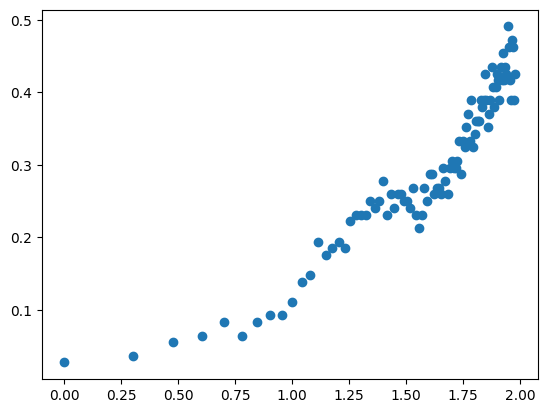

spanish french


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:02<00:00, 31.22it/s]


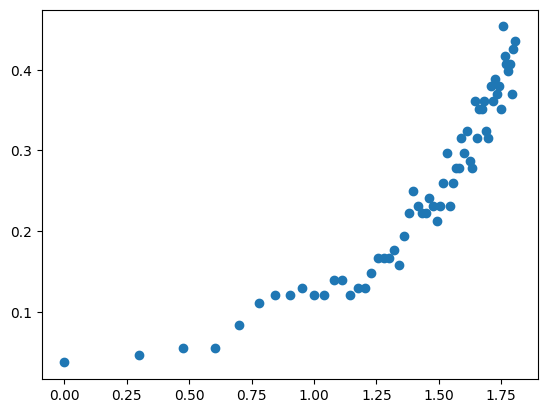

spanish german


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 26.34it/s]


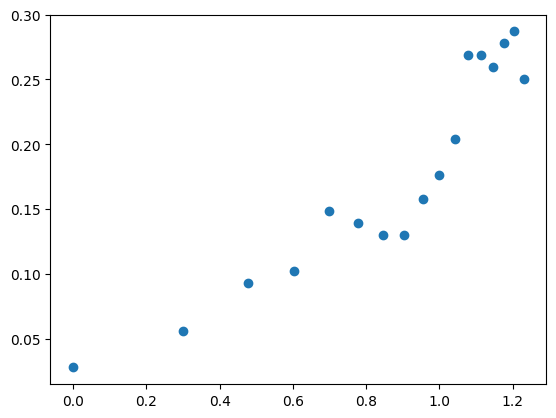

spanish italian


100%|████████████████████████████████████████████████████████████████████████████████| 251/251 [00:08<00:00, 28.58it/s]


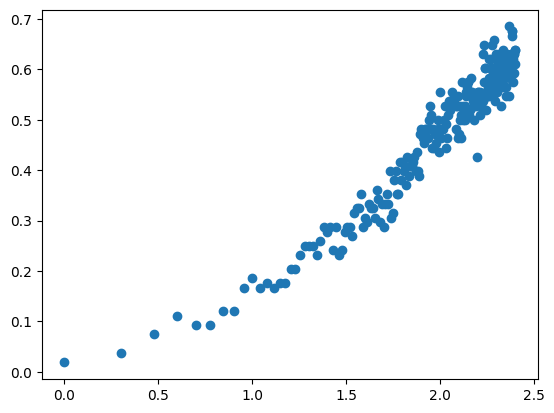

german english


100%|██████████████████████████████████████████████████████████████████████████████████| 73/73 [00:02<00:00, 29.06it/s]


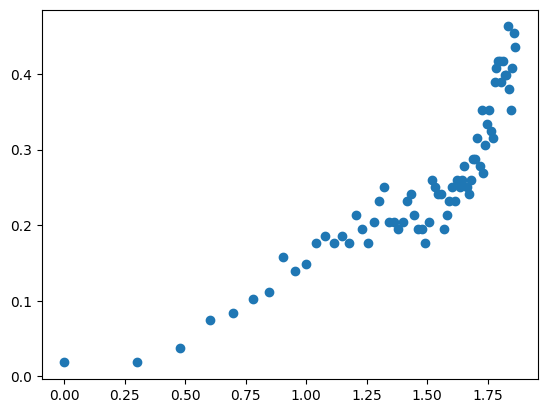

german french


100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.49it/s]


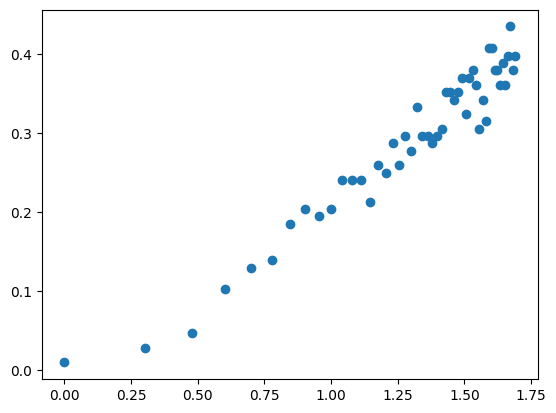

german spanish


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 30.61it/s]


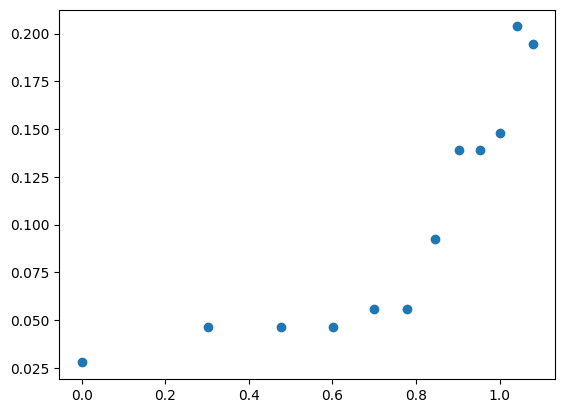

german italian


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:01<00:00, 23.93it/s]


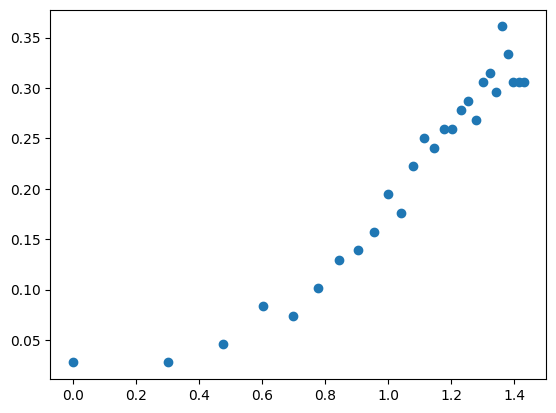

italian english


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:02<00:00, 26.51it/s]


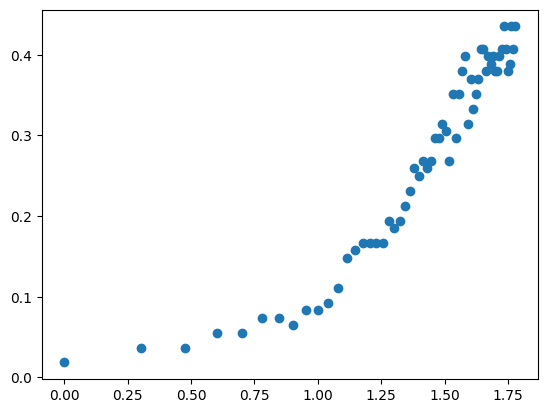

italian french


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 23.87it/s]


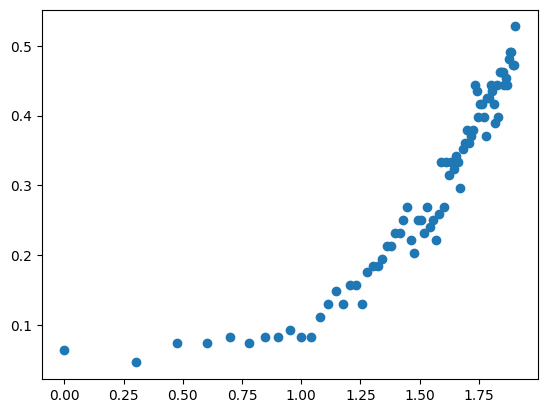

italian spanish


100%|████████████████████████████████████████████████████████████████████████████████| 247/247 [00:17<00:00, 14.09it/s]


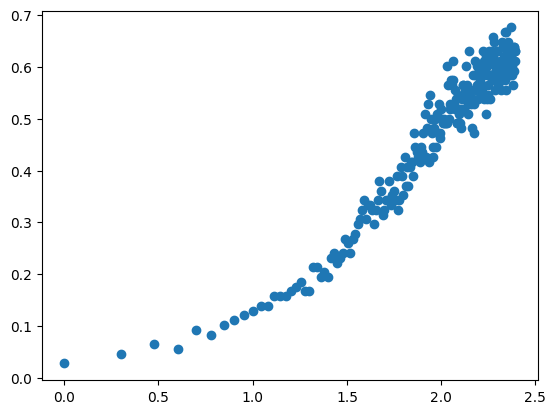

italian german


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 23.48it/s]


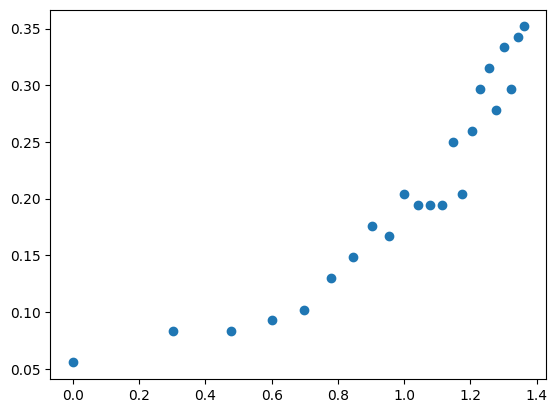

In [30]:
languages = ["english","french","spanish","german","italian"]
exclude ="_exc_all"

for lan in languages:
    for lan2 in languages:
        if lan==lan2:
            continue
        print(lan,lan2)
        res = rank_div(lan,lan2,range(1920,2008),exclude)
        
        plt.scatter(np.log10(range(1,len(res)+1)),np.array(res)/108)
        plt.show()



# Construct figures

In [31]:
from scipy.optimize import curve_fit
import scipy.integrate as integrate


def integrand(y,mu,sigma):
    return(np.exp(-(y-mu)**2/(2*sigma**2)))

def phi(log10k,mu,sigma):
    integral_result = [1/(sigma*np.sqrt(2*np.pi))*integrate.quad(lambda y: np.exp(-(y-mu)**2/(2*sigma**2))
                ,-np.inf,log10k_i)[0] for log10k_i in log10k] 
    
    return integral_result  


with open("rank_div.txt","r") as file:
    for line in file:
        data = [int(a) for a in line.split(",")[1:]]
        lanout, lanin = line.split(",")[0].split("_")
        
        break


In [32]:
log10k_values = np.array([0.5, 1, 1.5, 2])
phi_values = np.array([0.1, 0.15, 0.25, 0.5])
initial_guess = [1.75,1.0]

params,_ = curve_fit(phi,
                     log10k_values,phi_values,p0=initial_guess )
mu_fit,sigma_fit = params
sigma_fit

1.019188875071573

In [33]:
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerPatch

# --- handlers ---

class HandlerRect(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        x = width//2
        y = 0
        w = h = 10

        # create
        p = patches.Rectangle(xy=(x, y), width=w, height=h)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]


class HandlerCircle(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        r = 5
        x = r + width//2
        y = height//2

        # create 
        p = patches.Circle(xy=(x, y), radius=r)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]


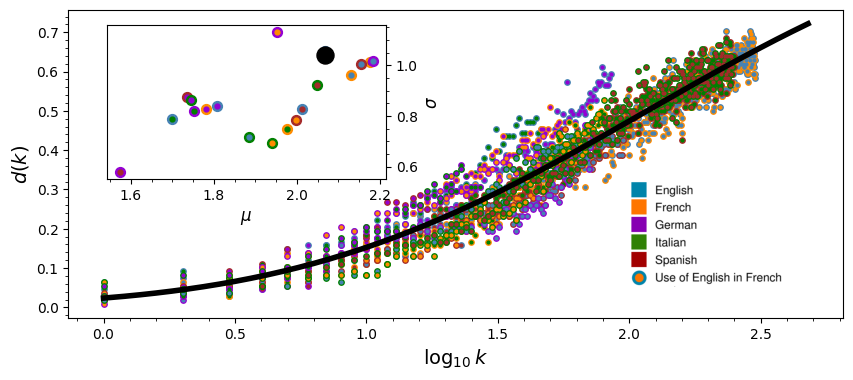

In [36]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}

languages = ["english","french","spanish","german","italian"]
exclude = "_exc_all"


fig, ax = plt.subplots(figsize=(10,4))

param_results = []
total_log10k = []
total_d = []
        
        
for lan_out in languages:
    for lan_in in languages:
        if lan_out == lan_in:
            continue
        

        with open("Fig4_data/" + lan_out + "_" + 
                  lan_in + exclude + ".txt","r") as file:    
            for line in file:
                data = [int(a) for a in line.split(",")[:-1]]
#                 print(data)
        
                    
        
            
            
        for i,r in enumerate(data):
            total_d.append(r/108)
            total_log10k.append( np.log10(i+1))
            
        
        ax.scatter(np.log10(range(1,len(data)+1)),np.array(data)/108,
                   color = colors[lan_out],s = 15)
        
        ax.scatter(np.log10(range(1,len(data)+1)),np.array(data)/108,
                   color = colors[lan_in],s = 4)
        
        params,_ = curve_fit(phi , np.log10(range(1,len(data)+1)),
                             np.array(data)/108)
        
        param_results.append([lan_out,lan_in,params[0],params[1]])
        
total_params,_ = curve_fit(phi,  total_log10k, total_d)
  
    
    
ax.plot(np.arange(0,2.7,0.02), 
             np.array([phi([r],total_params[0],total_params[1])  for r in np.arange(0,2.7,0.02)]).flatten(),
        "k",linewidth=4)

ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel(r"$\log_{10} k$",fontsize=14)
ax.set_ylabel("$d(k)$",fontsize=14)


ins = ax.inset_axes([0.05,0.45,0.36,0.5])

for line in param_results:
    lanout,lanin,mu,sigma = line
    ins.scatter(mu,sigma,color = colors[lanout],s=50)
    ins.scatter(mu,sigma,color = colors[lanin],s=12)

    ins.set_xlabel(r'$\mu$',fontsize=12)
    ins.set_ylabel(r'$\sigma$',fontsize=12)
    ins.yaxis.set_minor_locator(AutoMinorLocator())
    ins.xaxis.set_minor_locator(AutoMinorLocator())
    
    ins.yaxis.set_label_position("right")
    ins.yaxis.tick_right()

ins.scatter(total_params[0],total_params[1],color="k",s=150)    



# brown_patch = patches.Patch(color='brown', label='Spanish')
# green_patch = patches.Patch(color='green', label='Italian')
# darkviolet_patch = patches.Patch(color='darkviolet', label='German')
# darkorange_patch = patches.Patch(color='darkorange', label='French')
# steelblue_patch = patches.Patch(color='steelblue', label='English')

# # plt.plot(2000,1,markersize=0.001,label="Source Language",
# #             color="black",marker="o")

# circleb = patches.Circle((0,0), 1, facecolor='brown')
# circleg = patches.Circle((0,0), 1, facecolor='green')
# circled = patches.Circle((0,0), 1, facecolor='darkviolet')
# circledo= patches.Circle((0,0), 1, facecolor='darkorange')
# circles = patches.Circle((0,0), 1, facecolor='steelblue')

# plt.legend((circleb,circleg,circled,circledo,circles),
#         ("Spanish","Italian","German","French","English"),
#         handler_map = {
#             patches.Circle: HandlerCircle()},
#           loc="upper center",
#            ncol=1,
#     bbox_to_anchor=(0.75, 0.5),
#     bbox_transform=fig.transFigure ,
#           fontsize=10
#           )


ins2 = ax.inset_axes([0.65,0.1,0.35,0.35])

file_path = "Fig4_data/legends.PNG"
import matplotlib.image as mpimg

img = mpimg.imread(file_path)
ins2.imshow(img)  
ins2.axis('off') 

plt.savefig('Fig4_data/image' + exclude + '.pdf',bbox_inches = "tight")
                             

In [18]:
plt.show()